In [27]:
from sklearn.datasets import load_iris
import pandas as pd

In [28]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df_iris.shape

(150, 5)

In [30]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [32]:
# Dividimos el dataset en train y test
X = df_iris.drop('target', axis=1)
y = df_iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo
svm = SVC()

# Mostramos los parámetros del modelo
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
# utilizar grid search para encontrar los mejores parámetros
from sklearn.model_selection import GridSearchCV

In [34]:
# Definimos los parámetros que queremos probar
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto'], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Creamos el modelo
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Entrenamos el modelo
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros
grid_search_best = grid_search.best_params_
grid_search_best

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [35]:
# ulitizar random search para encontrar los mejores parámetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [36]:
# definir los parametros que queremos probar
param_dist = {'C': uniform(loc=0, scale=4), 
              'gamma': ['scale', 'auto'], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Creamos el modelo
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, cv=5, n_iter=100, random_state=42)

# Entrenamos el modelo
random_search.fit(X_train, y_train)

# Mostramos los mejores parámetros
random_search_best = random_search.best_params_
random_search_best

{'C': 3.8625281322982374, 'gamma': 'auto', 'kernel': 'linear'}

In [37]:
!pip install -q scikit-optimize


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
#  utliizar bayesian optimization para encontrar los mejores parámetros
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import numpy as np

In [40]:
# Definimos los parámetros que queremos probar
param_grid = {'C': Real(0.1, 5),
              'gamma': ['scale', 'auto'], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Creamos el modelo
bayes_search = BayesSearchCV(estimator=svm, search_spaces=param_grid, cv=5, n_iter=100, random_state=42)

# Entrenamos el modelo
bayes_search.fit(X_train, y_train)

# Mostramos los mejores parámetros
bayes_search_best = bayes_search.best_params_
bayes_search_best

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
from sklearn.metrics import accuracy_score


In [41]:
# evaluamos el modelo con los mejores parámetros encontrados con grid search
grid_search_model = grid_search.best_estimator_
grid_search_pred = grid_search_model.predict(X_test)
grid_search_acc = accuracy_score(y_test, grid_search_pred)

# evaluamos el modelo con los mejores parámetros encontrados con random search
random_search_model = random_search.best_estimator_
random_search_pred = random_search_model.predict(X_test)
random_search_acc = accuracy_score(y_test, random_search_pred)

# evaluamos el modelo con los mejores parámetros encontrados con bayesian optimization
# bayes_search_model = bayes_search.best_estimator_
# bayes_search_pred = bayes_search_model.predict(X_test)
# bayes_search_acc = accuracy_score(y_test, bayes_search_pred)

print('Grid Search Accuracy: ', grid_search_acc)
print('Random Search Accuracy: ', random_search_acc)
#print('Bayesian Search Accuracy: ', bayes_search_acc)

Grid Search Accuracy:  1.0
Random Search Accuracy:  0.9666666666666667


In [48]:
from sklearn.model_selection import cross_val_score

In [50]:
best_model = grid_search.best_estimator_

# Realizamos una validacion cruzada de 5 folds en el conjunto de datos completos y obtenemos la media y la desviación estándar
cv_scores = cross_val_score(best_model, X, y, cv=5)
cv_mean = np.mean(cv_scores)
cv_Std = np.std(cv_scores)

print('Cross Validation Accuracy: ', cv_mean)
print('Cross Validation Std: ', cv_Std)

Cross Validation Accuracy:  0.9800000000000001
Cross Validation Std:  0.016329931618554516


In [51]:
best_model_random = random_search.best_estimator_

# Realizamos una validacion cruzada de 5 folds en el conjunto de datos completos y obtenemos la media y la desviación estándar
cv_scores_random = cross_val_score(best_model_random, X, y, cv=5)
cv_mean_random = np.mean(cv_scores_random)
cv_Std_random = np.std(cv_scores_random)

print('Cross Validation Accuracy: ', cv_mean_random)
print('Cross Validation Std: ', cv_Std_random)

Cross Validation Accuracy:  0.9733333333333334
Cross Validation Std:  0.02494438257849294


In [45]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Accuracy:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Recall:  1.0
Precision:  1.0
F1:  1.0
Cross Validation Score:  0.9800000000000001


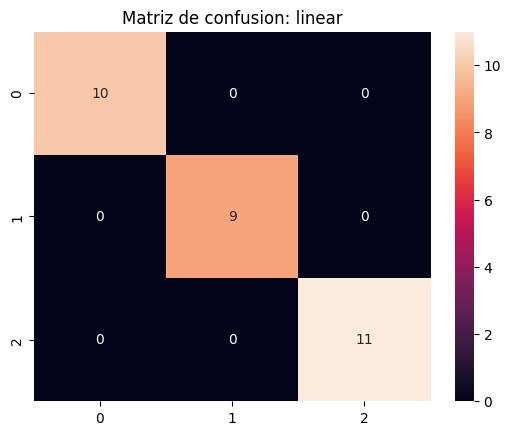

In [46]:
# utilizar los parametros encontrados con grid search para entrenar el modelo

# Creamos el modelo
svm = SVC(**grid_search_best)

# Entrenamos el modelo
svm.fit(X_train, y_train)

# Predecimos con el modelo
y_pred = svm.predict(X_test)

# Evaluamos el modelo
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('F1: ', f1_score(y_test, y_pred, average='macro'))

# Cross Validation
scores = cross_val_score(svm, X, y, cv=5)
print('Cross Validation Score: ', scores.mean())

# Matrix de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title(f"Matriz de confusion: {grid_search_best['kernel']}")
plt.show()

Accuracy:  0.9666666666666667
Confusion Matrix: 
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Recall:  0.9629629629629629
Precision:  0.9722222222222222
F1:  0.9658994032395567
Cross Validation Score:  0.9733333333333334


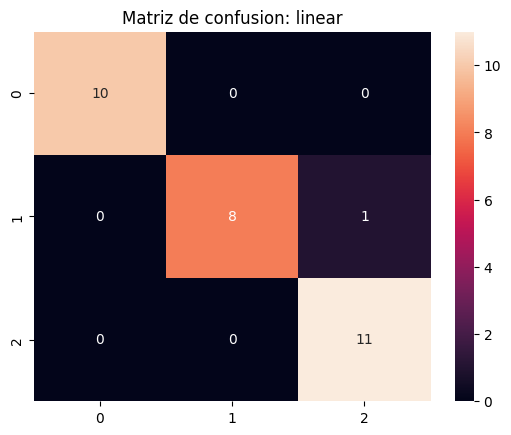

In [47]:
# utilizar los parametros encontrados con random search para entrenar el modelo

# Creamos el modelo
svm = SVC(**random_search_best)

# Entrenamos el modelo
svm.fit(X_train, y_train)

# Predecimos con el modelo
y_pred = svm.predict(X_test)

# Evaluamos el modelo
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('F1: ', f1_score(y_test, y_pred, average='macro'))

# Cross Validation
scores = cross_val_score(svm, X, y, cv=5)
print('Cross Validation Score: ', scores.mean())

# Matrix de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title(f"Matriz de confusion: {random_search_best['kernel']}")
plt.show()